In [11]:
import pandas as pd
import numpy as np

In [12]:
dirty_df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
dirty_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


## **Data Cleaning**

In [13]:
##Data Cleaning
# Adding disorder dummy
dirty_df['Disorder'] = dirty_df['Sleep Disorder'].apply(lambda x: 0 if pd.isna(x) else 1)
dirty_df['Apnea'] = dirty_df['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0)
dirty_df['Insomnia'] = dirty_df['Sleep Disorder'].apply(lambda x: 1 if x == 'Insomnia' else 0)

#Identify Hypertension
dirty_df[['Systolic', 'Diastolic']] = dirty_df['Blood Pressure'].str.split('/',expand=True).astype(int)
dirty_df['high_bp']=dirty_df.apply(lambda row: 1 if (row['Systolic'] >= 130 and row['Diastolic'] >= 80) else 0, axis=1)


##Create dummy for categorical variables
#Gender
dirty_df['Male'] = dirty_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
#BMI
dirty_df['Overweight'] = dirty_df['BMI Category'].apply(lambda x: 1 if x == 'Overweight' else 0)
dirty_df['Obese'] = dirty_df['BMI Category'].apply(lambda x: 1 if x == 'Obese' else 0)
#Occupation
unique = dirty_df['Occupation'].unique()
for occupation in unique:
    dirty_df[f'Occupation_{occupation}'] = dirty_df['Occupation'].apply(lambda x: 1 if x == occupation else 0)

#Rearranging
df = pd.concat([dirty_df.iloc[:, 19:20], dirty_df.iloc[:, 2:3], dirty_df.iloc[:, 4:8], dirty_df.iloc[:, 20:22], dirty_df.iloc[:, 18:19], dirty_df.iloc[:, 10:12], dirty_df.iloc[:, 22:], dirty_df.iloc[:, 13:16]], axis=1)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Male                             374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Overweight                       374 non-null    int64  
 7   Obese                            374 non-null    int64  
 8   high_bp                          374 non-null    int64  
 9   Heart Rate                       374 non-null    int64  
 10  Daily Steps                      374 non-null    int64  
 11  Occupation_Software Engineer     374 non-null    int64  
 12  Occupation_Doctor     

,Male,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Overweight,Obese,high_bp,Heart Rate,...,Occupation_Nurse,Occupation_Engineer,Occupation_Accountant,Occupation_Scientist,Occupation_Lawyer,Occupation_Salesperson,Occupation_Manager,Disorder,Apnea,Insomnia
0,1,27,6.1,6,42,6,1,0,0,77,...,0,0,0,0,0,0,0,0,0,0
1,1,28,6.2,6,60,8,0,0,0,75,...,0,0,0,0,0,0,0,0,0,0
2,1,28,6.2,6,60,8,0,0,0,75,...,0,0,0,0,0,0,0,0,0,0
3,1,28,5.9,4,30,8,0,1,1,85,...,0,0,0,0,0,0,0,1,1,0
4,1,28,5.9,4,30,8,0,1,1,85,...,0,0,0,0,0,0,0,1,1,0


In [14]:
#Split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25, random_state=4523) # fix random seed = 4523 for reproducibility
x_train = train.iloc[0:,0:22]
y_train = train[['Disorder']]
x_test = test.iloc[0:,0:22]
y_test = test[['Disorder']]

## **Visualizing Disorder Attributes**

In [15]:
# !matplotlib inline
# !pip install seaborn
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

In [16]:
data = df.copy()

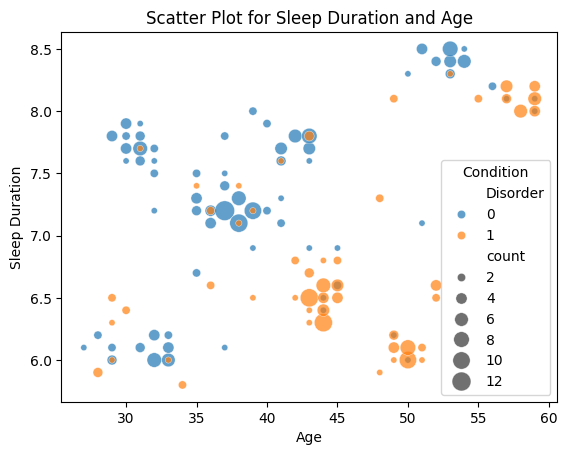

In [17]:
import seaborn as sns
import pandas as pd

counts = data.groupby(['Age', 'Sleep Duration', 'Disorder']).size().reset_index(name='count')

# Plot with Seaborn
sns.scatterplot(
    x="Age", y="Sleep Duration", size="count", hue="Disorder", data=counts,
    sizes=(20, 200), alpha=0.7
)
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Scatter Plot for Sleep Duration and Age')
plt.legend(title='Condition')  # Update legend title
plt.show()


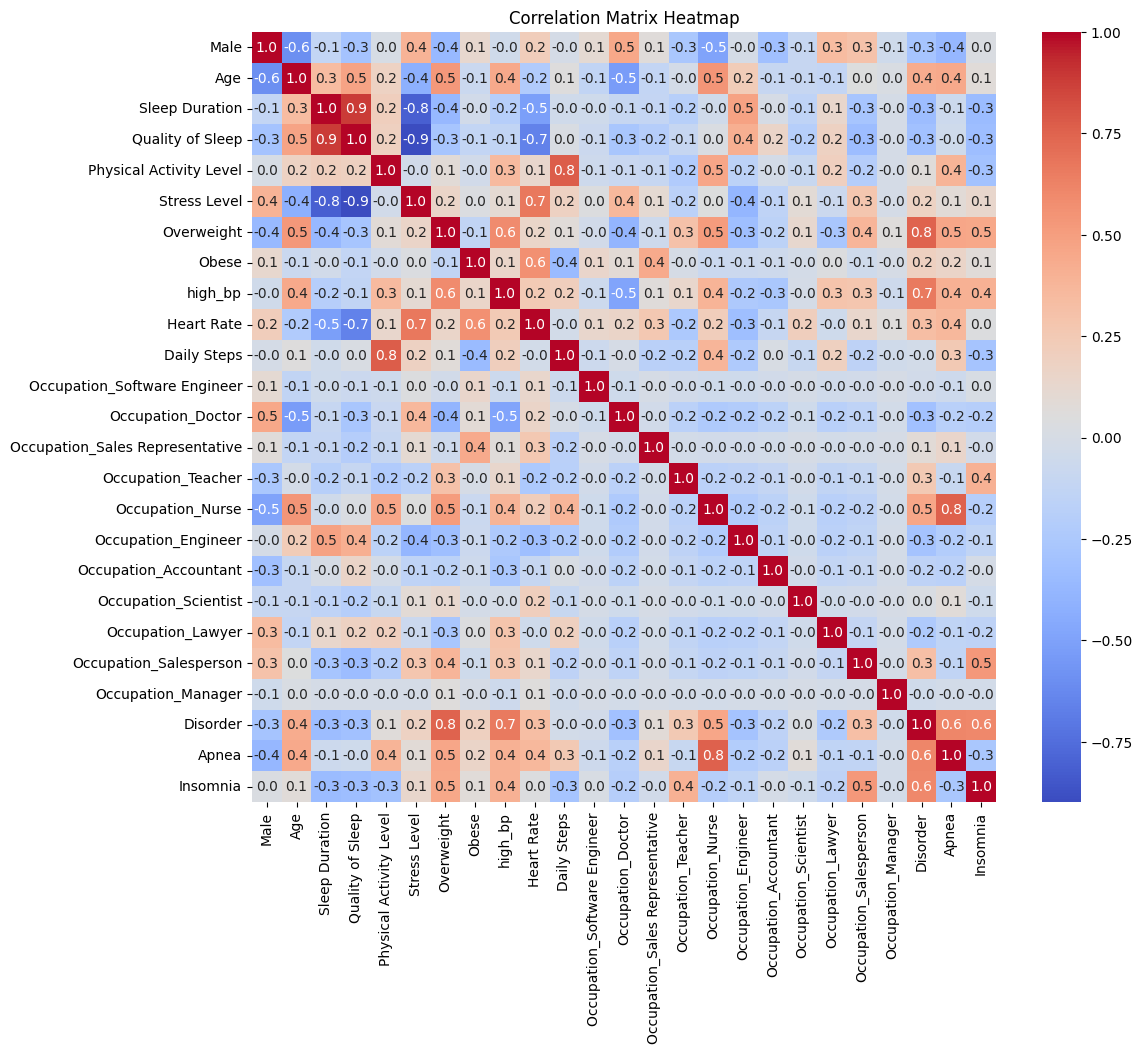

In [18]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))  # Increase width and height
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

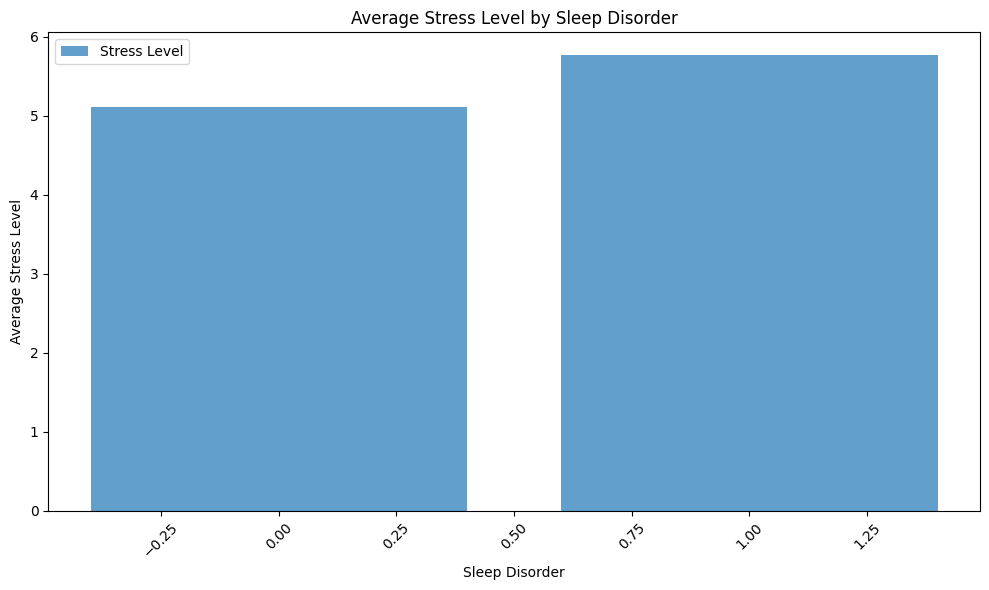

In [19]:
import matplotlib.pyplot as plt

# Group the data by Sleep Disorder and calculate mean Stress Level and Quality of Sleep
grouped_data = data.groupby('Disorder').agg({
    'Stress Level': 'mean',
    'Quality of Sleep': 'mean'
}).reset_index()

# Bar chart for average Stress Level by Sleep Disorder
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Disorder'], grouped_data['Stress Level'], alpha=0.7, label='Stress Level')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Stress Level')
plt.title('Average Stress Level by Sleep Disorder')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

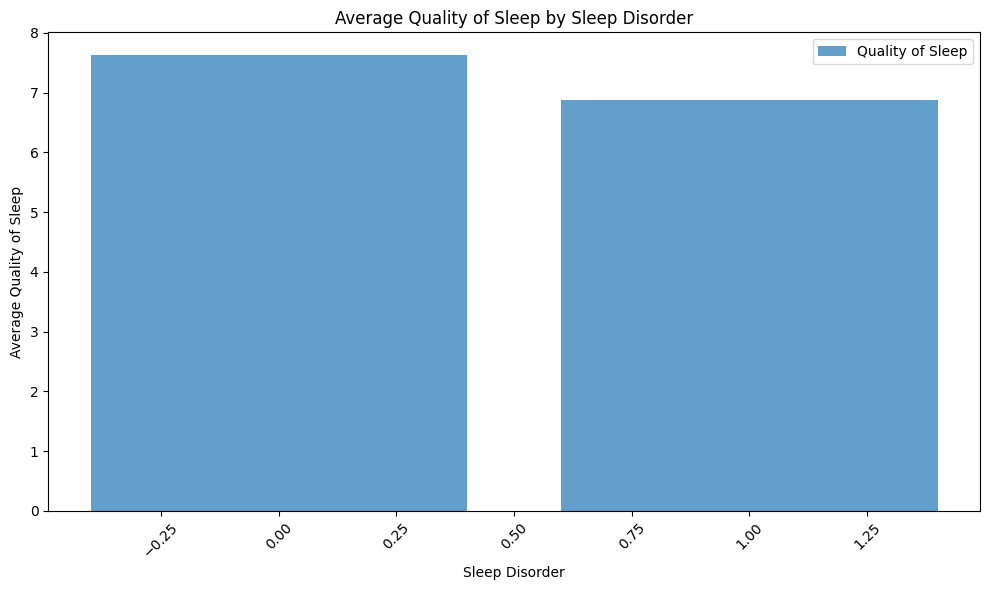

In [20]:
# # Bar chart for average Quality of Sleep by Sleep Disorder
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Disorder'], grouped_data['Quality of Sleep'], alpha=0.7, label='Quality of Sleep')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Quality of Sleep')
plt.title('Average Quality of Sleep by Sleep Disorder')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
data = df.copy()
data['Occupation'] = dirty_df['Occupation']
data['Gender'] = dirty_df['Gender']

visual_df = pd.DataFrame()
visual_df[['Occupation','Gender','Disorder']]= data[['Occupation','Gender','Disorder']]
visual_df.head()

,Occupation,Gender,Disorder
0,Software Engineer,Male,0
1,Doctor,Male,0
2,Doctor,Male,0
3,Sales Representative,Male,1
4,Sales Representative,Male,1


<Axes: title={'center': 'Demographic Data and Sleep disorder Occurance'}, xlabel='Occupation,Gender'>

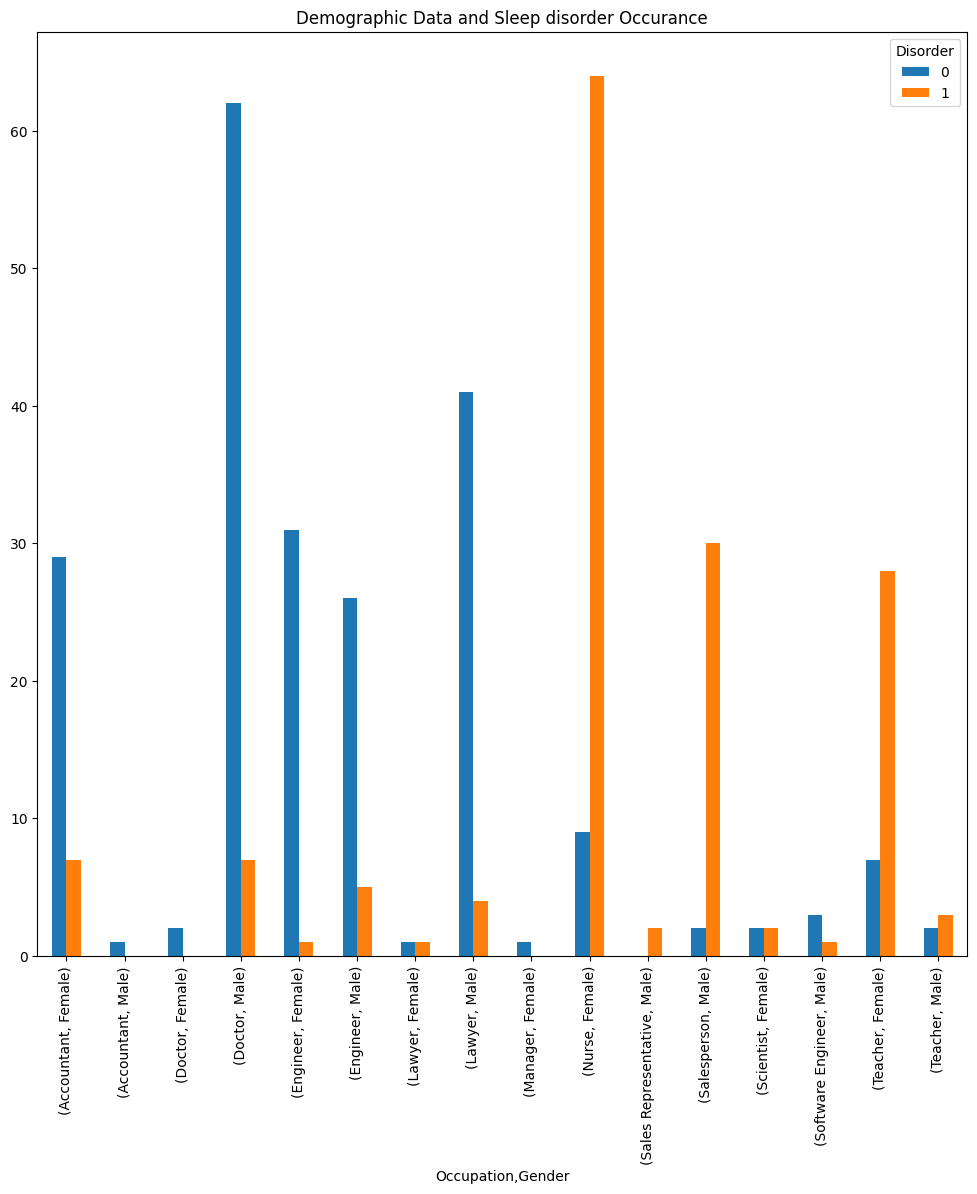

In [22]:
visual_df_2 = visual_df.groupby(['Occupation','Gender', 'Disorder'])
visual_df_2.size().unstack().plot(kind='bar',title="Demographic Data and Sleep disorder Occurance",figsize=(12,12))

## **Logistic Regression**

In [23]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,Male,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Overweight,Obese,high_bp,Heart Rate,...,Occupation_Sales Representative,Occupation_Teacher,Occupation_Nurse,Occupation_Engineer,Occupation_Accountant,Occupation_Scientist,Occupation_Lawyer,Occupation_Salesperson,Occupation_Manager,Disorder
337,0,54,8.4,9,30,3,0,0,0,65,...,0,0,0,1,0,0,0,0,0,0
92,1,35,7.5,8,60,5,0,0,0,70,...,0,0,0,0,0,0,0,0,0,0
6,1,29,6.3,6,40,7,0,1,1,82,...,0,1,0,0,0,0,0,0,0,1
225,1,44,6.3,6,45,7,1,0,1,72,...,0,0,0,0,0,0,0,1,0,1
104,0,36,7.2,8,60,4,0,0,0,68,...,0,1,0,0,0,0,0,0,0,1


In [24]:
df_reg = df_train.drop(columns=['Occupation_Software Engineer'])
df_reg.columns

Index(['Male', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Overweight', 'Obese',
       'high_bp', 'Heart Rate', 'Daily Steps', 'Occupation_Doctor',
       'Occupation_Sales Representative', 'Occupation_Teacher',
       'Occupation_Nurse', 'Occupation_Engineer', 'Occupation_Accountant',
       'Occupation_Scientist', 'Occupation_Lawyer', 'Occupation_Salesperson',
       'Occupation_Manager', 'Disorder'],
      dtype='object')

Check Multicollinearity:

Multicollinearity occurs when predictor variables are highly correlated, which can distort the coefficient estimates.

Use Variance Inflation Factor (VIF) to detect multicollinearity.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# only choose the variables with relative importance > 0.050
exclude_columns = ['Disorder']
filtered_columns = [col for col in df_reg.columns if col not in exclude_columns]
X = add_constant(df[filtered_columns])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# consider dropping or combining highly correlated variables (VIF > 10).

                            Feature          VIF
0                             const  4065.542912
1                              Male    10.851361
2                               Age    15.026074
3                    Sleep Duration     9.663110
4                  Quality of Sleep    29.023804
5           Physical Activity Level     7.258376
6                      Stress Level    24.147862
7                        Overweight     9.611297
8                             Obese     5.112509
9                           high_bp     4.708429
10                       Heart Rate    10.277017
11                      Daily Steps     6.209145
12                Occupation_Doctor    17.104453
13  Occupation_Sales Representative     1.845133
14               Occupation_Teacher    13.839097
15                 Occupation_Nurse    23.453108
16              Occupation_Engineer    17.319307
17            Occupation_Accountant    12.447592
18             Occupation_Scientist     2.750190
19                Oc

In [26]:
import statsmodels.formula.api as smf
# model 1
logit = smf.logit('Disorder ~ Q("Sleep Duration") + Q("Physical Activity Level") + Overweight + Obese + high_bp + Q("Daily Steps") + Q("Occupation_Sales Representative") + Occupation_Scientist + Occupation_Salesperson + Occupation_Manager', data=df_reg).fit()
logit.summary()

         Current function value: 0.262111
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Disorder   No. Observations:                  280
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.6156
Time:                        23:44:24   Log-Likelihood:                -73.391
converged:                      False   LL-Null:                       -190.92
Covariance Type:            nonrobust   LLR p-value:                 7.471e-45
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.4854      3.014      0.825      0.410      -3.421       8.392
Q("Sleep Duration")                     -0.5328      0.373     -1.430      0.153      -1.263       0.197
Q("Physical Activity Level")            -0.0128      0.023     -0.558      0.577      -0.058       0.032
Overweight                               3.1234      0.491      6.363      0.000       2.161       4.085
Obese                                   29.4643   9.53e+05   3.09e-05      1.000   -1.87e+06    1.87e+06
high_bp                                  3.3514      0.671      4.994      0.000       2.036       4.667
Q("Daily Steps")                        -0.0003      0.000     -1.073      0.283      -0.001       0.000
Q("Occupation_Sales Representative")     0.6899   5.26e+06   1.31e-07      1.000   -1.03e+07    1.03e+07
Occupation_Scientist                    -2.0372      1.601     -1.272      0.203      -5.176       1.101
Occupation_Salesperson                  -0.8221      0.926     -0.888      0.374      -2.636       0.992
Occupation_Manager                     -16.8885   5508.113     -0.003      0.998   -1.08e+04    1.08e+04
========================================================================================================
"""

In [27]:
# model 2
logit_2 = smf.logit('Disorder ~ Overweight + high_bp', data=df_reg).fit()
logit_2.summary()

Optimization terminated successfully.
         Current function value: 0.322296
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Disorder   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.5273
Time:                        23:44:24   Log-Likelihood:                -90.243
converged:                       True   LL-Null:                       -190.92
Covariance Type:            nonrobust   LLR p-value:                 1.891e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5055      0.455     -7.697      0.000      -4.398      -2.613
Overweight     2.8519      0.389      7.331      0.000       2.089       3.614
high_bp        2.8993      0.474      6.120      0.000       1.971       3.828
==============================================================================
"""

In [28]:
# predict on testing set
y_test_result = y_test.copy()
y_test_result['predicted_raw'] = logit_2.predict(x_test)
y_test_result

,Disorder,predicted_raw
265,1,0.904276
275,1,0.904276
153,0,0.352925
278,1,0.904276
8,0,0.029155
...,...,...
64,0,0.029155
134,0,0.352925
209,0,0.352925
196,1,0.904276


In [29]:
# convert the predicted probabilities into binary outcomes by using a threshold of 0.5
y_test_result['predicted_binary'] = (y_test_result['predicted_raw'] > 0.5).astype(int)
y_test_result[['Disorder','predicted_raw', 'predicted_binary']].head()

,Disorder,predicted_raw,predicted_binary
265,1,0.904276,1
275,1,0.904276,1
153,0,0.352925,0
278,1,0.904276,1
8,0,0.029155,0


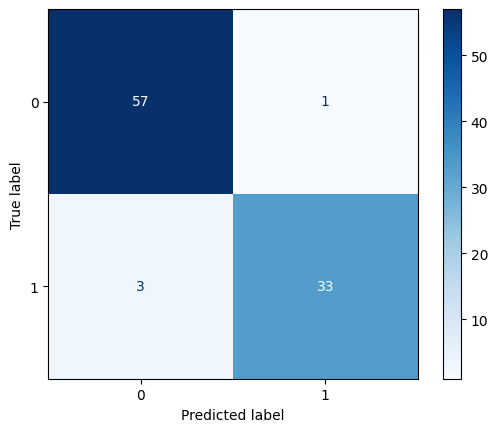

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# confusion matrix
# `Disorder` is the true label and `predicted_binary` is the predicted label
true_y = y_test_result['Disorder']
predicted_y = y_test_result['predicted_binary']

# Generate the confusion matrix
cm = confusion_matrix(true_y, predicted_y)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

In [31]:
tn = 57 # true negative
tp = 33 # true positive
fn = 3 # false negative
fp = 1 # false positive

In [32]:
# evaluation metrics
# Sensitivity (Recall/True Positive Rate)
sensitivity = tp/ (tp+fn)
# Specificity (True Negative Rate)
specificity = tn / (tn+fp)
# False Positive Rate (FPR)
fpr = fp / (fp+tn)
# Precision (Positive Predictive Value)
precision = tp / (tp+fp)
# Accuracy
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity, specificity, fpr, precision, accuracy

(0.9166666666666666,
 0.9827586206896551,
 0.017241379310344827,
 0.9705882352941176,
 0.9574468085106383)

## **Classification Tree**

In [33]:
# Classification tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

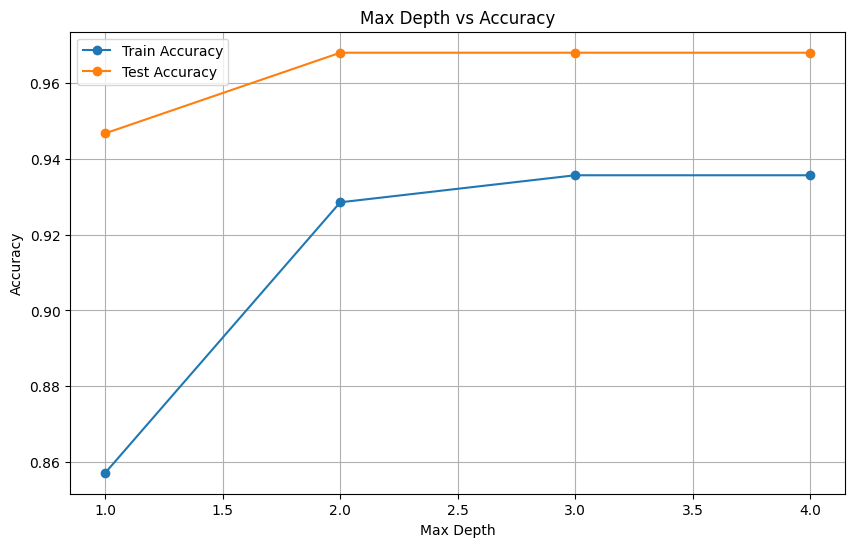

Best max_depth: 2, Test Accuracy: 0.9681


In [34]:
#Test for best max_depth
max_depths = range(1, 5)
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = tree.DecisionTreeClassifier(random_state=4523, max_depth=depth, criterion='entropy')
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy')
plt.legend()
plt.grid()
plt.show()

best_depth = max_depths[np.argmax(test_accuracies)]
print(f"Best max_depth: {best_depth}, Test Accuracy: {max(test_accuracies):.4f}")

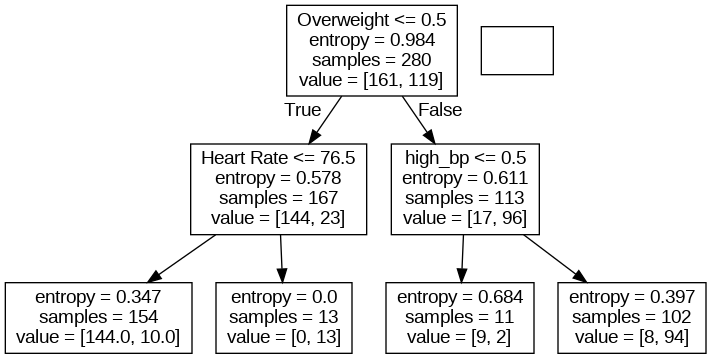

In [35]:
best_model = tree.DecisionTreeClassifier(random_state=4523,max_depth = 2,criterion='entropy') # information gain
best_model.fit(x_train,y_train)
feature_names = [key for key in df.iloc[:,:23] if not key == 'Disorder']
dot_data = tree.export_graphviz(best_model, out_file=None,feature_names=feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
p_test = best_model.predict(x_test)
print(confusion_matrix(p_test,np.array(y_test)))

[[57  2]
 [ 1 34]]


In [37]:
tn, fp, fn, tp = confusion_matrix(np.array(y_test),p_test).ravel()
print(tn, fp, fn, tp)
#Sensitivity/True positive rate
tpr=tp/(tp+fn)
#Specificity/True negative rate
tnr=tn/(tn+fp)
#False positive rate
fpr=fp/(fp+tn)
#Precision
precision=tp/(tp+fp)
#Accuracy
accuracy=(tp+tn)/(tp+tn+fp+fn)
#Misclassification Rate
mis=(fp+fn)/(tp+tn+fp+fn)
print('Ture positive rate:',round(tpr,3),'True negative rate:',round(tnr,3),'Accuracy:',round(accuracy,3))


57 1 2 34
Ture positive rate: 0.944 True negative rate: 0.983 Accuracy: 0.968


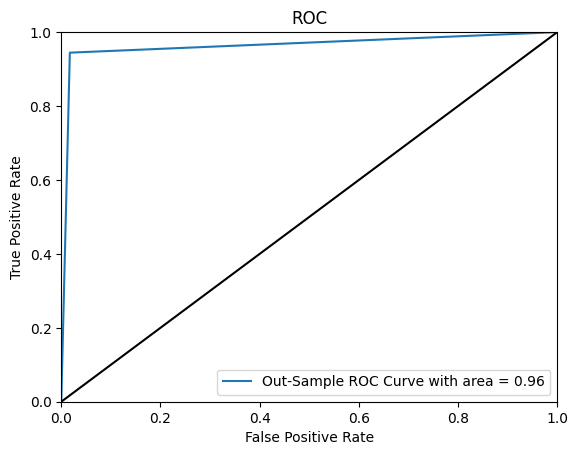

In [38]:
# Create ROC curve
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf()
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC')
pl.legend(loc="lower right")
pl.show()

[0.6310071403309686, 0.24802105585235482, 0.12097180381667672]


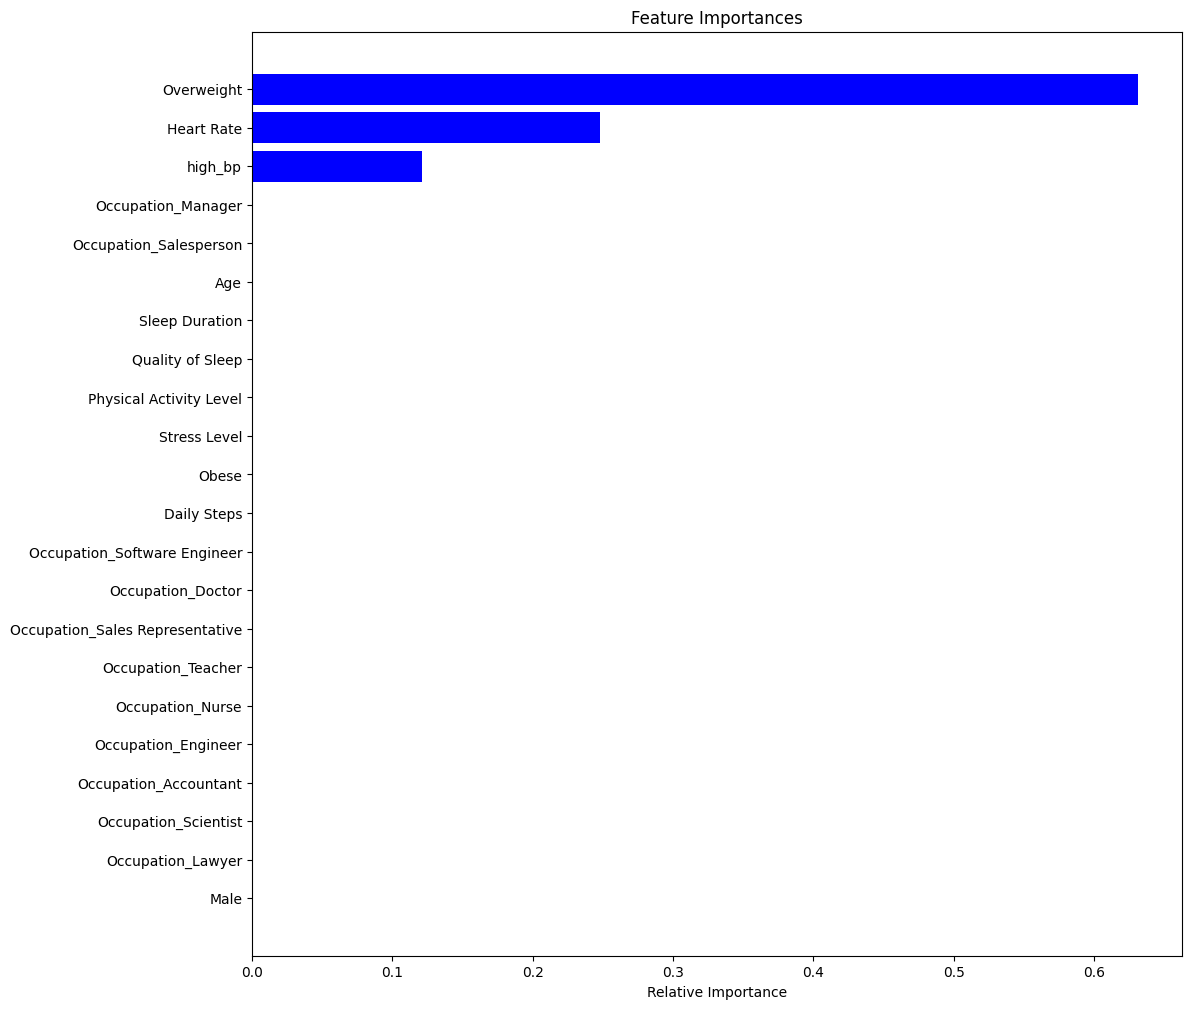

In [39]:
# Feature Importance
import matplotlib.pyplot as plt
%matplotlib inline
importances = best_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

print(sorted(importances,reverse=True)[:3])

## **Random Forest**

In [40]:
# Initial Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=4523) # set seed = 4523
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=10, random_state=4523)

In [41]:
model.score(x_test,y_test)

0.9361702127659575

In [42]:
# Initial confusion matrix
y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)

specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Sensitivity: 0.8611111111111112
Specificity: 0.9827586206896551


Text(0.5, 0, 'Relative Importance')

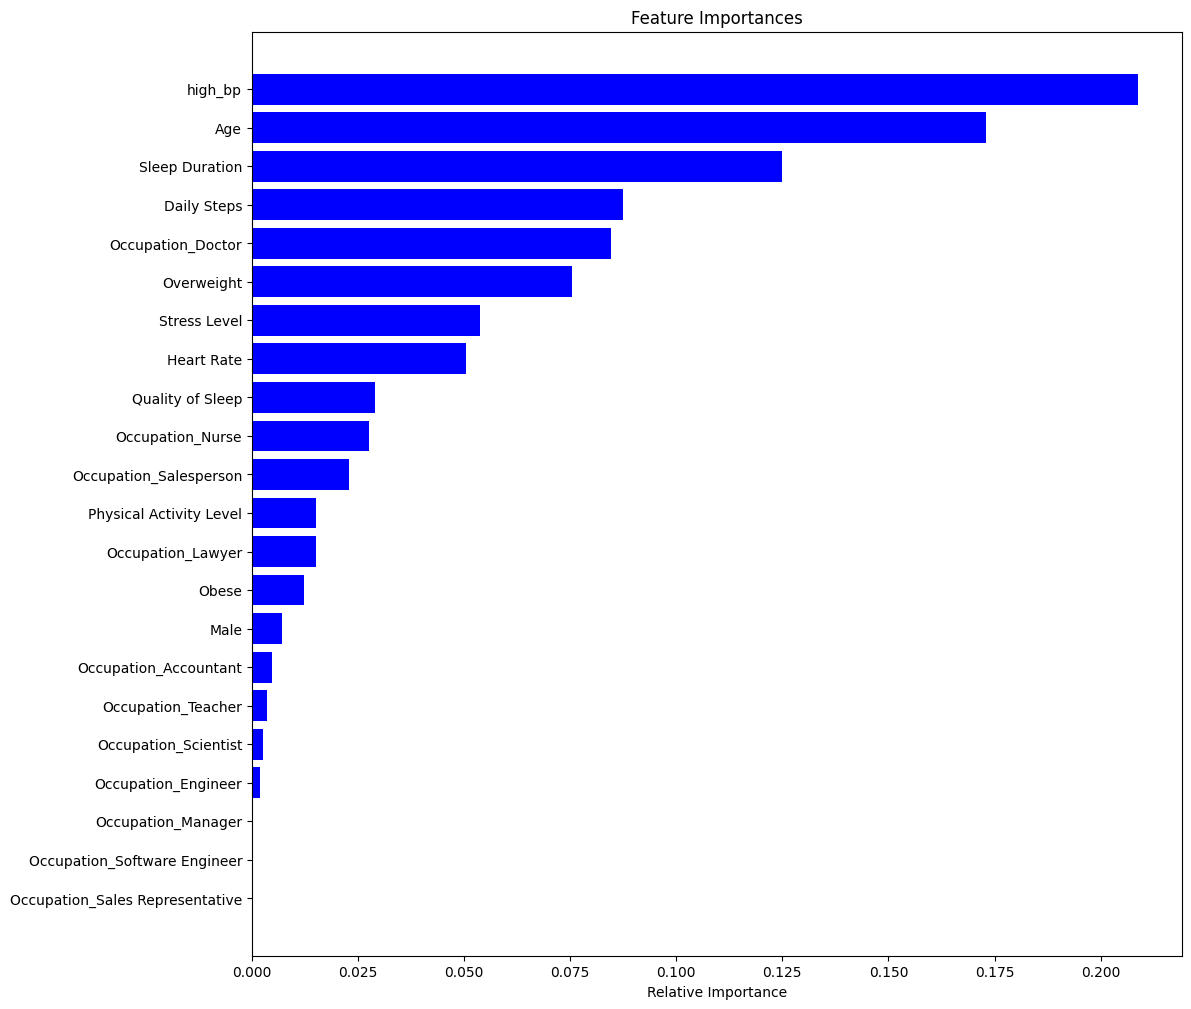

In [43]:
# Feature Importance for the Initial random forest
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [44]:
# Find the best ensemble
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

best_model = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
best_model.fit(x_train, np.ravel(y_train))
best_model.best_score_, best_model.best_params_

(0.9321428571428572,
 {'max_depth': 4,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 30})

In [45]:
# Best ensemble's confusion matrix
y_pred = best_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)

specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Sensitivity: 0.9444444444444444
Specificity: 0.9827586206896551


In [47]:
accuracy = (TN + TP)/ (TN + FP + FN + TP)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9680851063829787


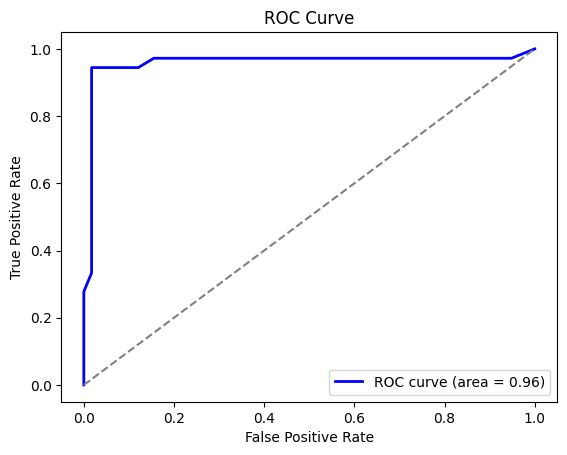

In [ ]:
# Best ensemble's ROC
best_rf_model = best_model.best_estimator_

y_pred_prob = best_rf_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

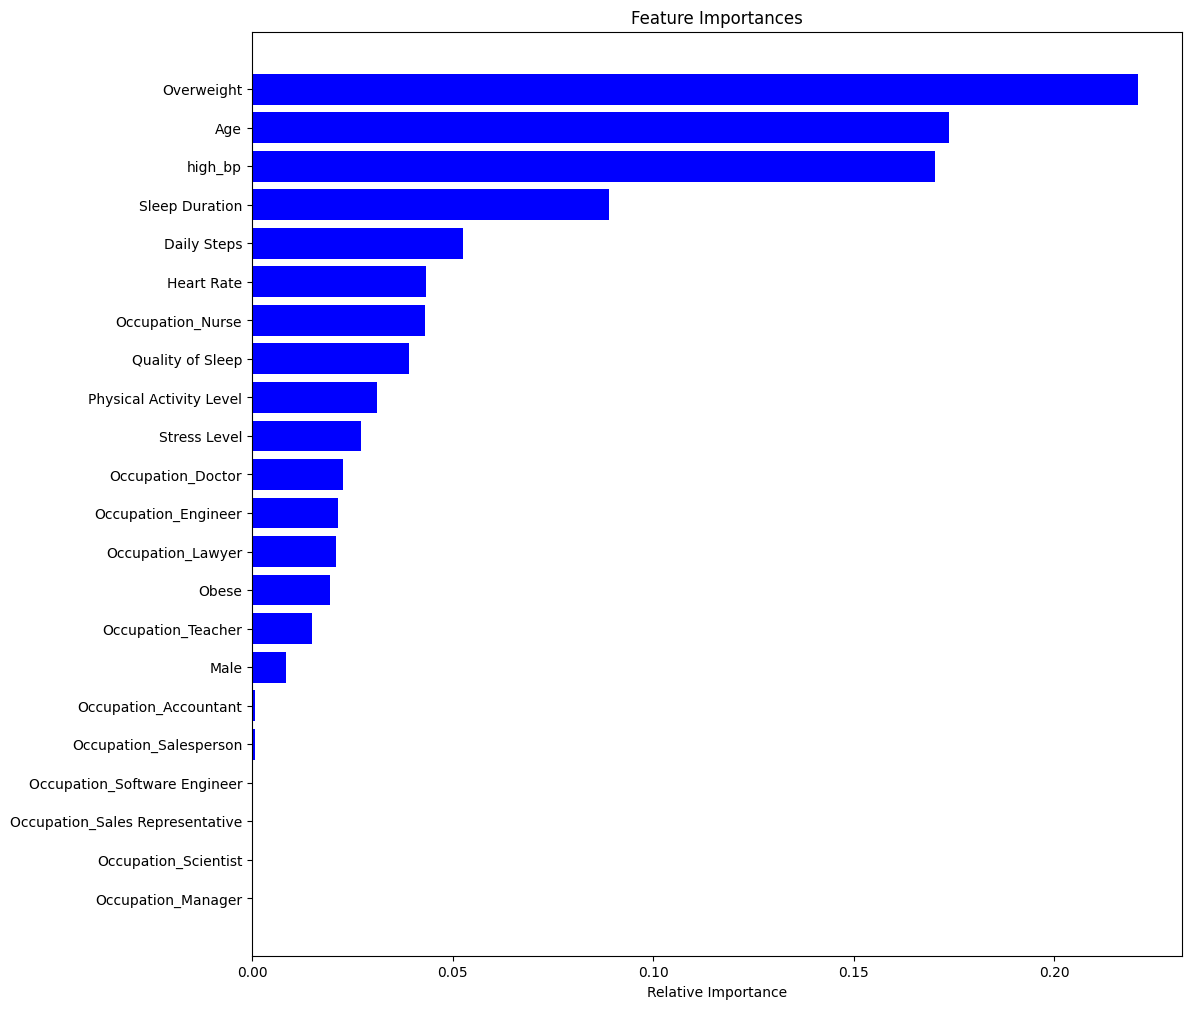

In [ ]:
# Best ensemble's feature importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), np.array(feature_names)[indices])
plt.xlabel('Relative Importance')
plt.show()

## **Neural Network**

In [ ]:
### Neural Network with L2 Regularizatoin
from sklearn.neural_network import MLPClassifier
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    # 'solver': ('sgd','lbfgs','adam'),
    'solver':['adam'],
    'alpha' : [0.0001],
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((10,),(10,10),(20,),(5,5),(30),(50,), (20,30), (60), (30,30), (90)),
    # 'hidden_layer_sizes': [(80,), (100,), (150,), (60, 60),(100, 50), (100, 100)],
    'max_iter': (500, 200)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(x_train, np.ravel(y_train))
print(gs.best_score_)
print(gs.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

0.6321428571428572
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 60, 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'adam'}


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
seed = 4558
np.random.seed(seed)
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(30), max_iter = 500,
                    activation='relu', alpha = 0.0001,
                    learning_rate='invscaling')
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, predictions)

print("Testing Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8191489361702128
